# Objective:  
To understand characteristics of customers groups and draw meaningful conclusion from the observation

# Metrics of success:
Draw meaningful conclusions from the Anlysis that can suggest customer behaviour

# Context:
The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

# Experimntal Designs:
1)Ensure data is clean

2)A focus on the design itself, rather than the results

3)Extensive univariate, bivariate and multivariate analysis

4)Ensure results are valid, easily interpreted, and definitive.

# Reading data

In [59]:
# ## Necessary Library
# library(tidyverse)

In [89]:
data <- read.csv("http://bit.ly/EcommerceCustomersDataset")

In [61]:
## Checlig the top six rows of the dataset
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [62]:
## Checlig the bottom six rows of the dataset
tail(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


# Checking Data

In [90]:
## Checking number of rows and columns
dim(data)

[1] 12330    18

The dataset has 12330 rows and 18 columns

In [64]:
## Checking data information
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

The data information states thata there are 2 categorical variables(visitor type,month)this is false as there are 6 more categorical variables from the data dictionary.
Most variables are integers and floats
Two variables are boolean type

In [91]:
## Checking for missing values
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

The  first 8 variables have 14 missing values,the rest do not have any misssing values

In [66]:
# Checking for duplicates
anyDuplicated(data)


[1] 159

There are 159 duplicates in the dataset

# Tidying the data

##### Missing values

In [97]:
## Removing missing values
df = na.omit(data)
head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [98]:
## Checking for missing values

colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

There are no missing values left in the dataset

##### Removing duplicates

In [99]:
new.df <- df[!duplicated(df),]

In [100]:
# Checking for duplicates
anyDuplicated(new.df)

[1] 0

There are no duplicated rows in the dataset

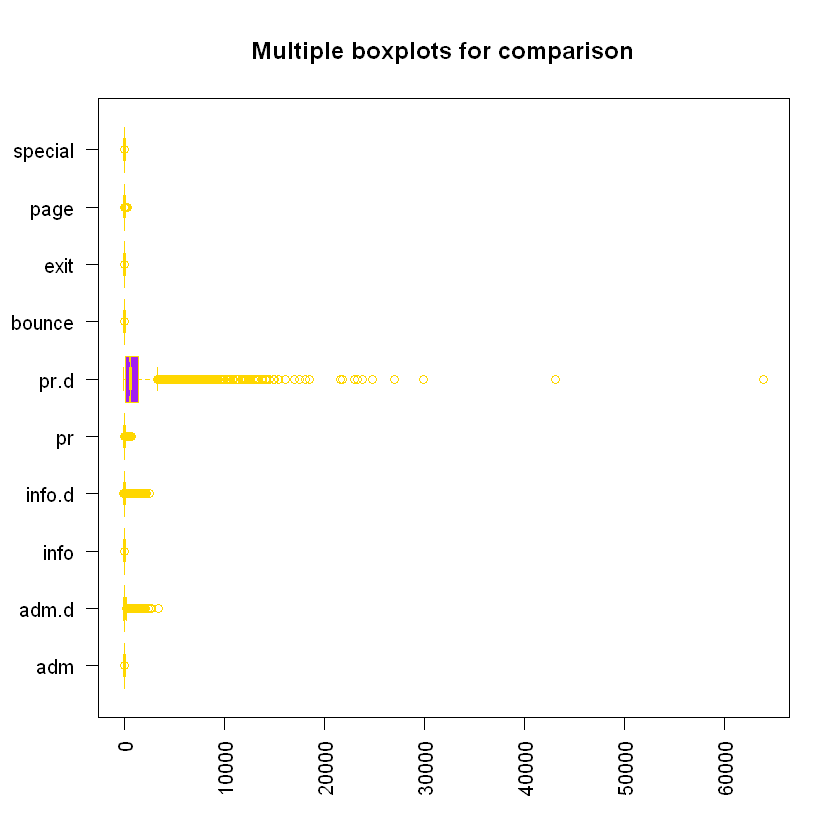

In [162]:
## Check for outliers in numerical columns
## Using boxplots to see the data anomalies
adm <- df$Administrative
adm.d <-df$Administrative_Duration
info <- df$Informational
info.d <- df$Informational_Duration
pr <- df$ProductRelated    
prd.d <- df$ProductRelated_Duration
bounce <-df$BounceRates
exit <- df$ExitRates
page <-df$PageValues
special <- df$SpecialDay

 

boxplot(adm1, admd2, info1, info2, pr1, prd2, bounce_r, exit_r, page_values, special_day,
main = "Multiple boxplots for comparison",
at = c(1,2,3,4,5,6,7,8,9,10),
names = c("adm", "adm.d", "info", "info.d", "pr", "pr.d", "bounce", "exit", "page", "special"),
las = 2,
col = c("purple"),
border = "gold",
horizontal = TRUE,
notch = TRUE
)

The three duration columns have outliers. However since its time factor it is not wise to remove them.

This also shows thst Most variables are not normally distributes as they have longer tails.

In [101]:
str(new.df)

'data.frame':	12199 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

# Exploratory Analysis

##### Univariate Analysis

###### Ctegorical variables

In [73]:
## Frequency tables for categorical variables

table(df$Month)


 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1706  182  432  285 1853 3328 2983  549  448 

Sites wre more visited in the months of May and November and least visited in February 

In [74]:
table(df$VisitorType)


      New_Visitor             Other Returning_Visitor 
             1693                81             10425 

Returning visitors show more appearance on sites as compared to new visitotrs

In [75]:
table(df$OperatingSystems)


   1    2    3    4    5    6    7    8 
2548 6536 2530  478    6   19    7   75 

In [76]:
table(df$Browser)


   1    2    3    4    5    6    7    8    9   10   11   12   13 
2426 7878  105  730  466  174   49  135    1  163    6   10   56 

In [77]:
table(df$Region)


   1    2    3    4    5    6    7    8    9 
4711 1127 2382 1168  317  800  758  431  505 

In [78]:
table(df$TrafficType)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2383 3907 2017 1066  260  443   40  343   41  450  247    1  728   13   36    3 
  17   18   19   20 
   1   10   17  193 

In [79]:
table(df$Weekend)


FALSE  TRUE 
 9343  2856 

The sites were visited more during the weekday than the weekend

###### Continous Variable

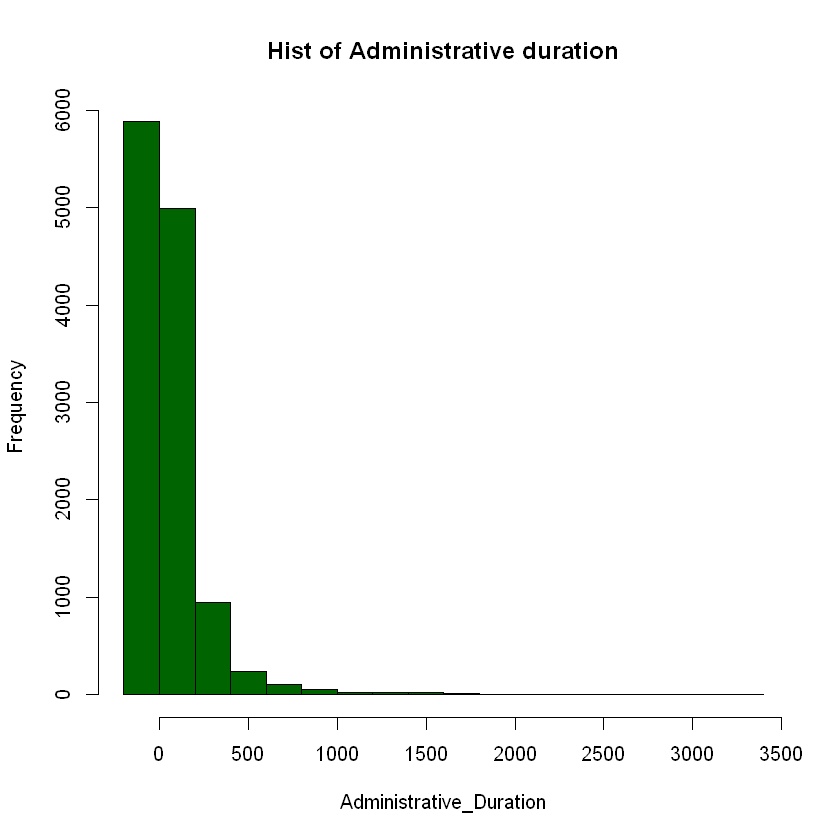

In [163]:
## Continous Variables
## 

hist(df$Administrative_Duration,
    main = "Hist of Administrative duration",
    xlab = "Administrative_Duration",
    col = "darkgreen")

The histogram shows most people who visited the administrative page did not spend much time there

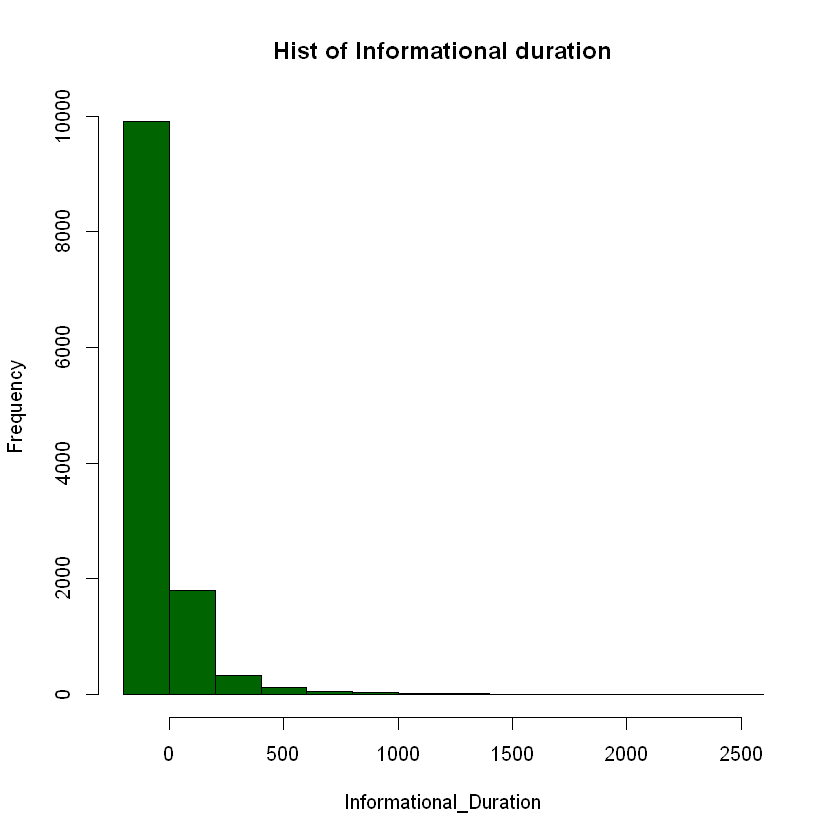

In [166]:
## 

hist(df$Informational_Duration,
    main = "Hist of Informational duration",
    xlab = "Informational_Duration",
    col = "darkgreen")

The histogram shows most people who visited the Informational page did not spend much time there

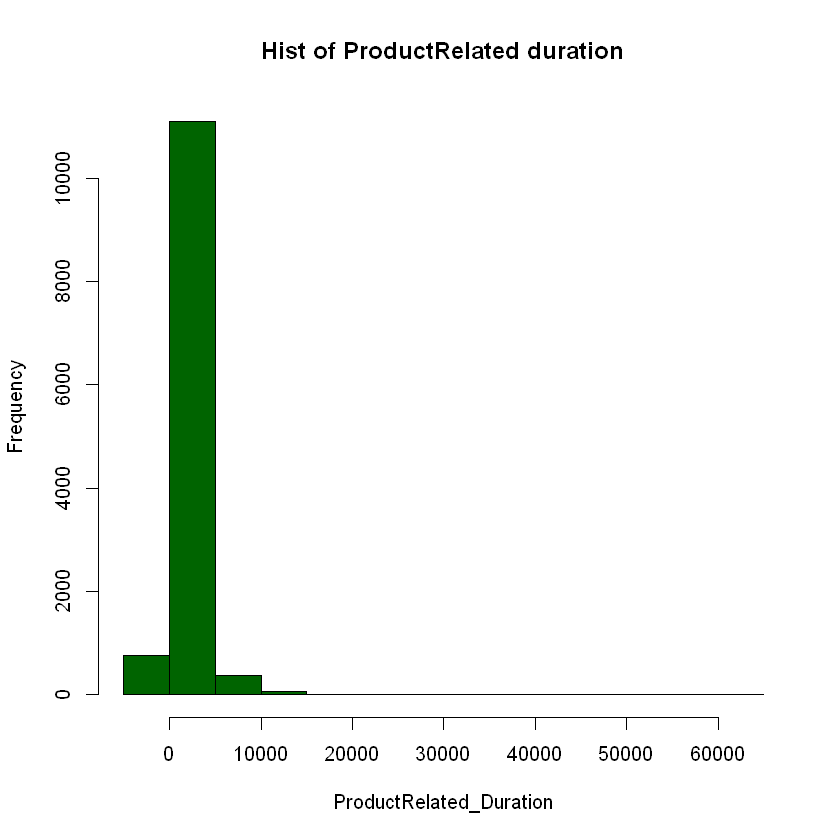

In [169]:

##
hist(df$ProductRelated_Duration,
    main = "Hist of ProductRelated duration",
    xlab = "ProductRelated_Duration",
    col = "darkgreen")

Most peple spent time in the product page as compared to other pages visited

#### Bivariate Analysis

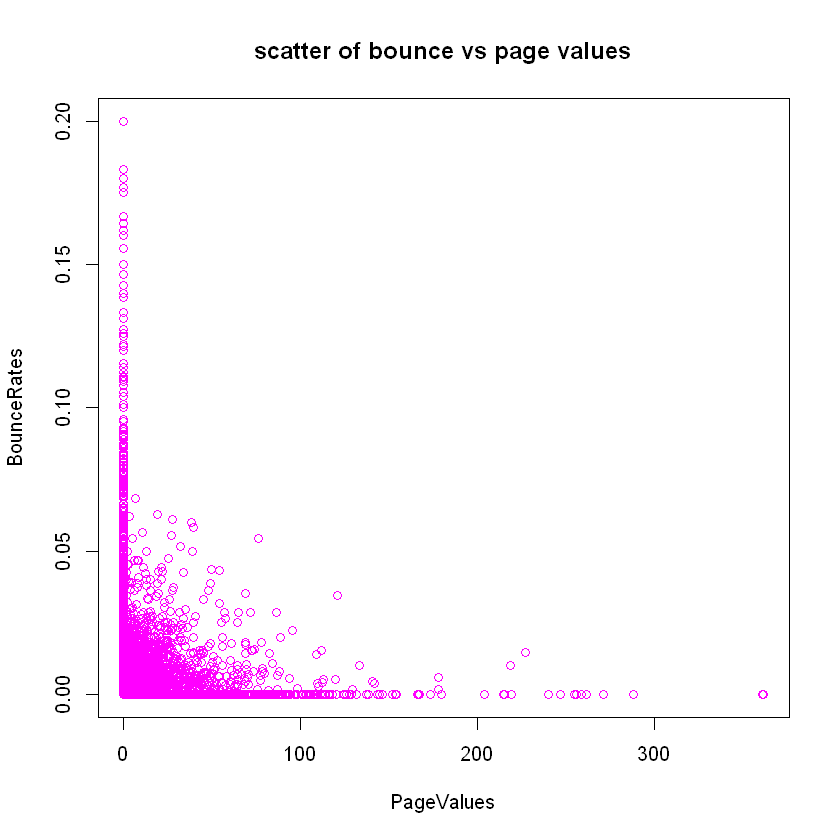

In [174]:
plot(BounceRates ~ PageValues, dat = df,
     main = "scatter of bounce vs page values",
    col = "magenta" )

Bounce ans page value rates are inversly proportional. Decrease in one leads to decrease in the other
This means that the people who bounced did not contribute to the pages value

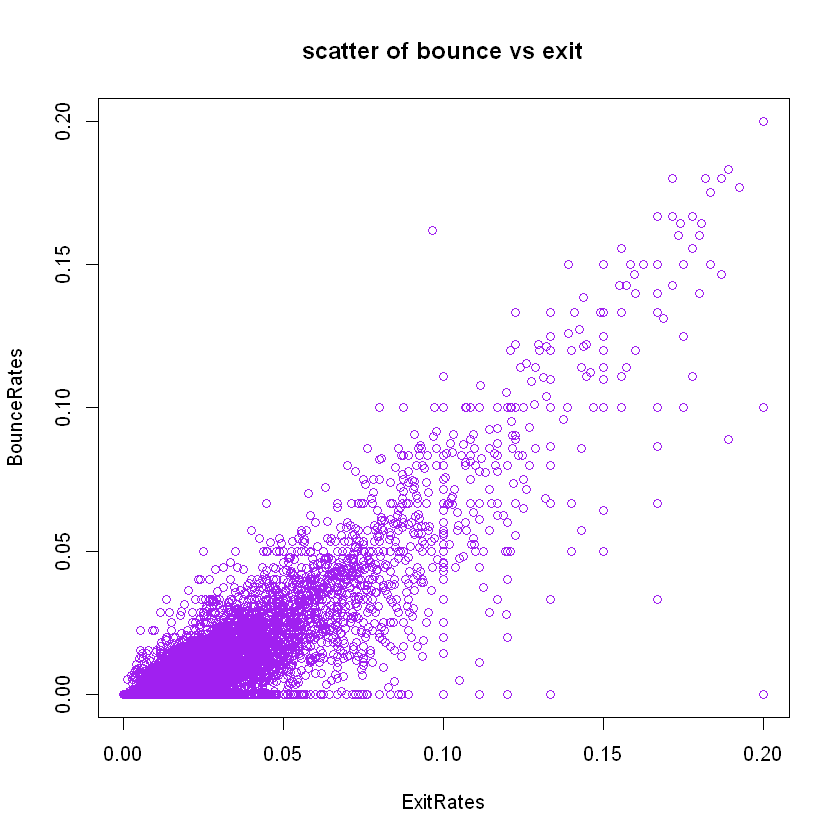

In [173]:
plot(BounceRates ~ ExitRates, dat = df,
     main = "scatter of bounce vs exit",
    col = "purple" )

Exit and Bounce rates are linearly related. This means the people who exit the  pages are likely to have bounced

##### Multivariate Analysis

In [ ]:
## 
Plota()

# Implementing the solution

##### Preprocessing


In [102]:
## Removing the target/class variable(species)
new = new.df[,c(1:17)]
str(new)

'data.frame':	12199 obs. of  17 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

The class variable(Revenue) has been removed from the dataframe

In [103]:
## storing Class variable in another vriable
df.class = new.df[, "Revenue"]
head(df.class)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

The Revenue is stored as the class label and the rest of the dataset remains for analysis

In [ ]:
## Label encoding
install.packages("CatEncoders")

In [ ]:
library(CatEncoders)

In [104]:
## Converting logical variables into numerical.
indx <- sapply(new.df,is.logical)
new.df[indx] <- lapply(new.df[indx], function(x) as.numeric(as.factor(x)))

In [105]:
str(new.df)

'data.frame':	12199 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [106]:
## converting factor variables into numerical
## Label encoding
cols =  names(which(sapply(new.df, is.factor)))
for(i in cols){
    encode <- LabelEncoder.fit(new.df[,i])
    new.df[,i]<- transform(encode,new.df[,i])
}

In [107]:
str(new.df)

'data.frame':	12199 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : int  3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Weekend                : nu

All columns have been changed to numerical

In [127]:
unique(new.df$Month)

[1]  3  6  7  9  5  4  1  8 10  2

In [108]:
## Creating a copy of my dataset

copy_df <- new.df

In [109]:
## Normalizing data

df_norm <- as.data.frame(apply(copy_df[, 1:17], 2, function(x) (x - min(x))/(max(x)-min(x))))

In [110]:
head(df_norm)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,0.2222222,0.0000000,0.00000000,0.000,0.00000000,1,0
0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,0.2222222,0.1428571,0.08333333,0.000,0.05263158,1,0
0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,0.2222222,0.4285714,0.00000000,1.000,0.10526316,1,0
0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,0.2222222,0.2857143,0.08333333,0.125,0.15789474,1,0
0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,0.2222222,0.2857143,0.16666667,0.000,0.15789474,1,1
0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,0.2222222,0.1428571,0.08333333,0.000,0.10526316,1,0


All dataset has been normalized(between a mean of 0 and SD of 1)

#### Clustering

##### K-Means Clustering

In [111]:
## Creating 3 k groups
result = kmeans(df_norm,3)

In [ ]:
# Searching for the optimal number of clusters
# # Elbow method
# fviz_nbclust(df_norm, kmeans, method = "wss") +
#     geom_vline(xintercept = 4, linetype = 2)+
#   labs(subtitle = "Elbow method")
# # Silhouette method
# fviz_nbclust(df_norm, kmeans, method = "silhouette")+
#   labs(subtitle = "Silhouette method")
# # Gap statistic
# # nboot = 50 to keep the function speedy.
# # recommended value: nboot= 500 for your analysis.
# # Use verbose = FALSE to hide computing progression.
# set.seed(123)
# fviz_nbclust(df_norm, kmeans, nstart = 25,  method = "gap_stat", nboot = 50)+
#   labs(subtitle = "Gap statistic method")

In [112]:
result$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0.09203496,0.02558730,0.02449521,0.016384511,0.04704343,0.01916769,0.08728349,0.1847150,0.01747125,0.05560224,0.5885854,0.1610644,0.1029704,0.2682511,0.1608801,0.83105742,1
0.09358258,0.02719310,0.01362683,0.007825722,0.02562001,0.01011988,0.02667445,0.1063580,0.03334550,0.02059748,0.5424528,0.1732929,0.1412474,0.3095519,0.1785419,0.02279874,0
0.08367865,0.02341885,0.02122827,0.014207572,0.04804611,0.02017461,0.11943217,0.2314785,0.01343208,0.07074712,0.5741406,0.1584686,0.1123673,0.2631180,0.1595185,0.99900880,0


In [114]:
## Plotting the K_means
par(mfrow = c(1,2),mar = c(5,4,2,2))



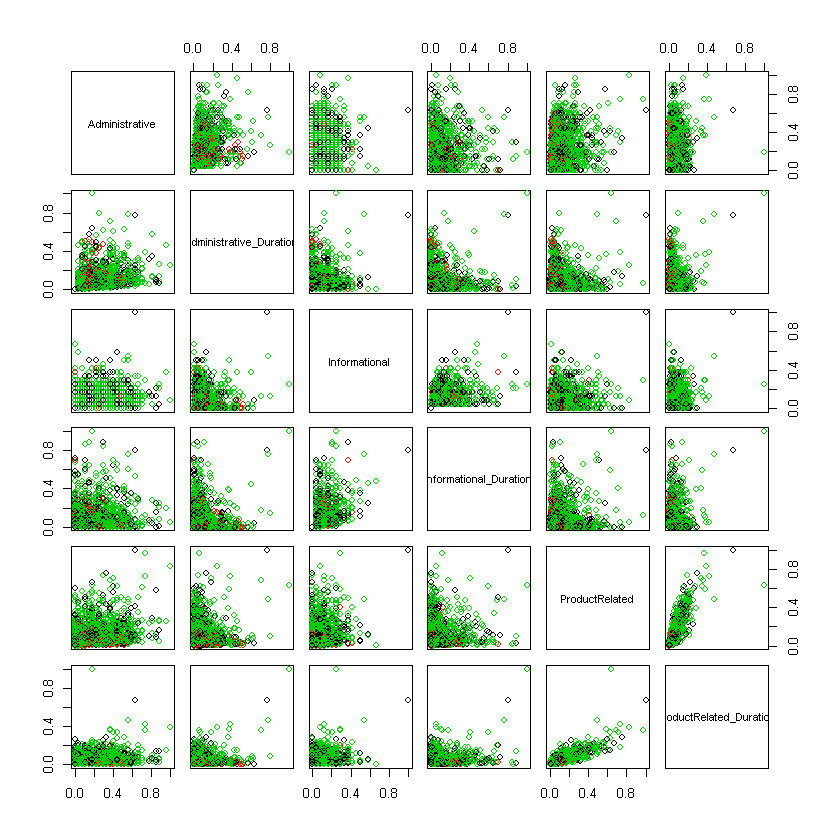

In [156]:
plot(df_norm[,1:6], col = result$cluster)

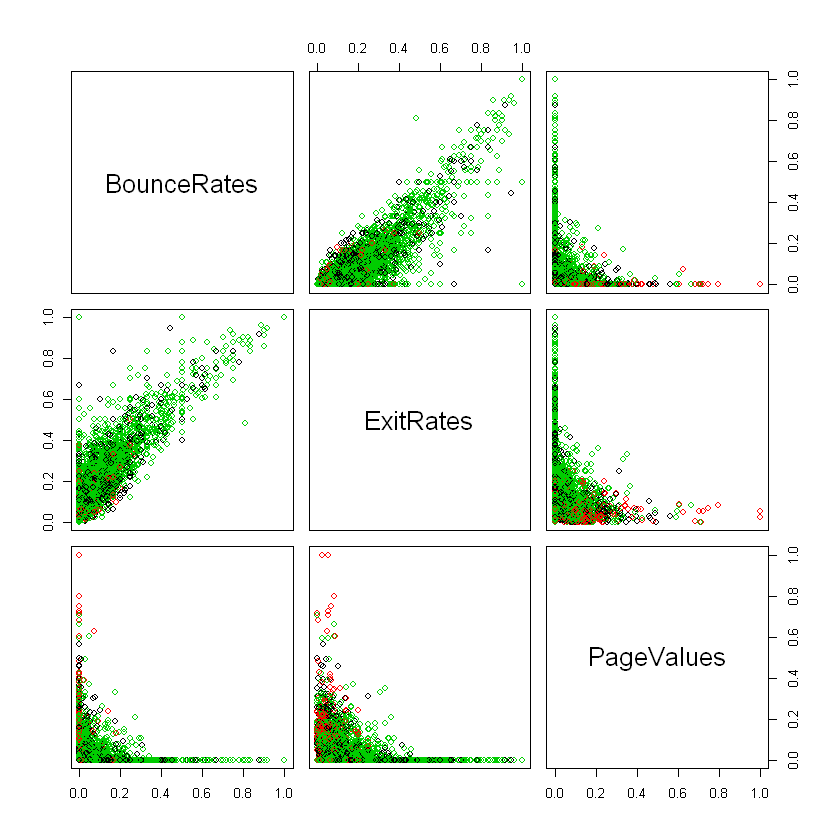

In [155]:
plot(df_norm[,7:9], col = result$cluster)

The graph above shows that from the metrics measured by google,Bounce and Exit rates have a linear relationship(increase in one shows a consecuive increase in another),
whereaspage value shows a negative linear relationship with both bounce and exit rates.

In [128]:
table(result$cluster, df.class)

   df.class
    FALSE TRUE
  1  2357  499
  2   940  332
  3  6994 1077

##### Hierarchical clustering

In [119]:
## Computing eucledean distance between observations
d <- dist(df_norm, method = "euclidean")
head(d)

[1] 1.1314264 1.0930481 0.8841012 1.5833826 1.2872048 0.5625733

In [122]:
## ward's method

ward <- hclust(d, method = "ward.D2" )

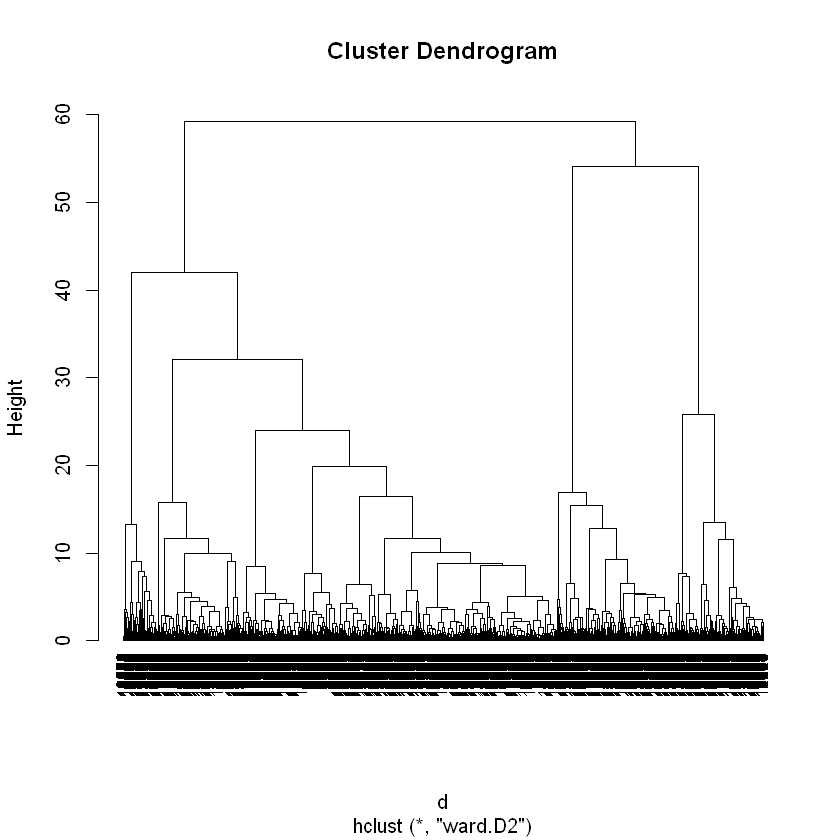

In [123]:
# Lastly, we plot the obtained dendrogram
plot(ward, cex = 0.8 ,hang =-1)

#### Dimensionality reduction

##### PCA(Principal Componenet Analysis)

In [124]:
df.pca <- prcomp(df_norm,center = TRUE, scale. = TRUE)
df.pca

Standard deviations (1, .., p=17):
 [1] 1.8418826 1.3444880 1.1760245 1.0867594 1.0378939 1.0123803 0.9890023
 [8] 0.9771656 0.9661469 0.9350898 0.9187767 0.8989912 0.8707422 0.6498877
[15] 0.5933727 0.3518152 0.2899059

Rotation (n x k) = (17 x 17):
                                 PC1         PC2          PC3         PC4
Administrative           0.381249076 -0.02881053  0.046780224  0.17658197
Administrative_Duration  0.328106855 -0.07200041  0.058573469  0.24075716
Informational            0.348170119 -0.23906401 -0.008126580  0.25185368
Informational_Duration   0.296493893 -0.25391252 -0.003726236  0.27383237
ProductRelated           0.411401814 -0.17868060  0.024107179 -0.30840614
ProductRelated_Duration  0.413201144 -0.21005214  0.032008888 -0.26081987
BounceRates             -0.271839820 -0.55324640  0.028018418  0.21353353
ExitRates               -0.320806727 -0.53693651  0.010710739  0.17667886
PageValues               0.091107294  0.19806242  0.143605055  0.14445353
SpecialDa

In [129]:
summary(df.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8419 1.3445 1.17602 1.08676 1.03789 1.01238 0.98900
Proportion of Variance 0.1996 0.1063 0.08135 0.06947 0.06337 0.06029 0.05754
Cumulative Proportion  0.1996 0.3059 0.38725 0.45672 0.52009 0.58038 0.63791
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.97717 0.96615 0.93509 0.91878 0.89899 0.8707 0.64989
Proportion of Variance 0.05617 0.05491 0.05143 0.04966 0.04754 0.0446 0.02484
Cumulative Proportion  0.69408 0.74899 0.80042 0.85008 0.89762 0.9422 0.96706
                          PC15    PC16    PC17
Standard deviation     0.59337 0.35182 0.28991
Proportion of Variance 0.02071 0.00728 0.00494
Cumulative Proportion  0.98778 0.99506 1.00000

From PCA analysis, we can conclude that the highest dimension only accounts for 19.96% of the whole dataset.This is a bad representation

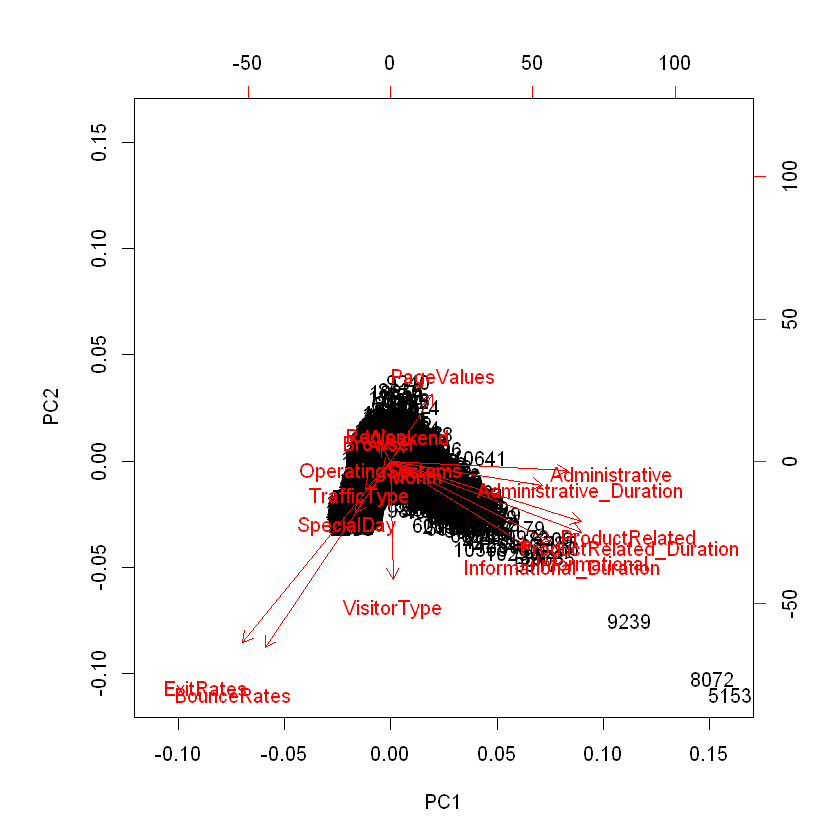

In [125]:
biplot(df.pca)

##### tSNE(t- Distribution Stochastic Neighbour Embedding)

In [131]:
## Installing Rtnse package
install.packages('Rtsne')

Installing package into 'C:/Users/Hp/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Hp\AppData\Local\Temp\RtmpK0uFbQ\downloaded_packages


In [132]:
library(Rtsne)

In [150]:
# Curating the database for analysis 
Labels<-df.class
df.class<-as.factor(df.class)

In [151]:
# For plotting
#
colors = rainbow(length(unique(df.class)))
names(colors) = unique(df.class)



In [152]:
# Executing the algorithm on curated data
# 
tsne <- Rtsne(df_norm[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500)

Performing PCA
Read the 12199 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12199
Done in 6.39 seconds (sparsity = 0.010477)!
Learning embedding...
Iteration 50: error is 99.796266 (50 iterations in 6.85 seconds)
Iteration 100: error is 86.797742 (50 iterations in 7.83 seconds)
Iteration 150: error is 80.806154 (50 iterations in 4.96 seconds)
Iteration 200: error is 79.102500 (50 iterations in 4.22 seconds)
Iteration 250: error is 78.292452 (50 iterations in 4.46 seconds)
Iteration 300: error is 2.922354 (50 iterations in 4.46 seconds)
Iteration 350: error is 2.489330 (50 iterations in 4.11 seconds)
Iteration 400: error is 2.213904 (50 iterations in 4.09 seconds)
Iteration 450: error is 2.023964 (50 iterations in 3.81 seconds)
Iteration 500: error is 1.883887 (50 iterations in 5.91 seconds)
Fitting performed in 50.69 seconds.


In [153]:
# Getting the duration of execution
# 
execution <- system.time(Rtsne(df_norm[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))


Performing PCA
Read the 12199 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 12199
Done in 5.98 seconds (sparsity = 0.010477)!
Learning embedding...
Iteration 50: error is 99.796260 (50 iterations in 5.31 seconds)
Iteration 100: error is 86.656597 (50 iterations in 7.74 seconds)
Iteration 150: error is 81.075474 (50 iterations in 4.22 seconds)
Iteration 200: error is 79.239304 (50 iterations in 3.96 seconds)
Iteration 250: error is 78.383489 (50 iterations in 4.39 seconds)
Iteration 300: error is 2.924020 (50 iterations in 3.68 seconds)
Iteration 350: error is 2.488415 (50 iterations in 3.71 seconds)
Iteration 400: error is 2.215999 (50 iterations in 4.35 seconds)
Iteration 450: error is 2.029465 (50 iterations in 4.19 seconds)
Iteration 500: error is 1.889276 (50 iterations in 3.73 seconds)
Fitting performed in 45.29 seconds.


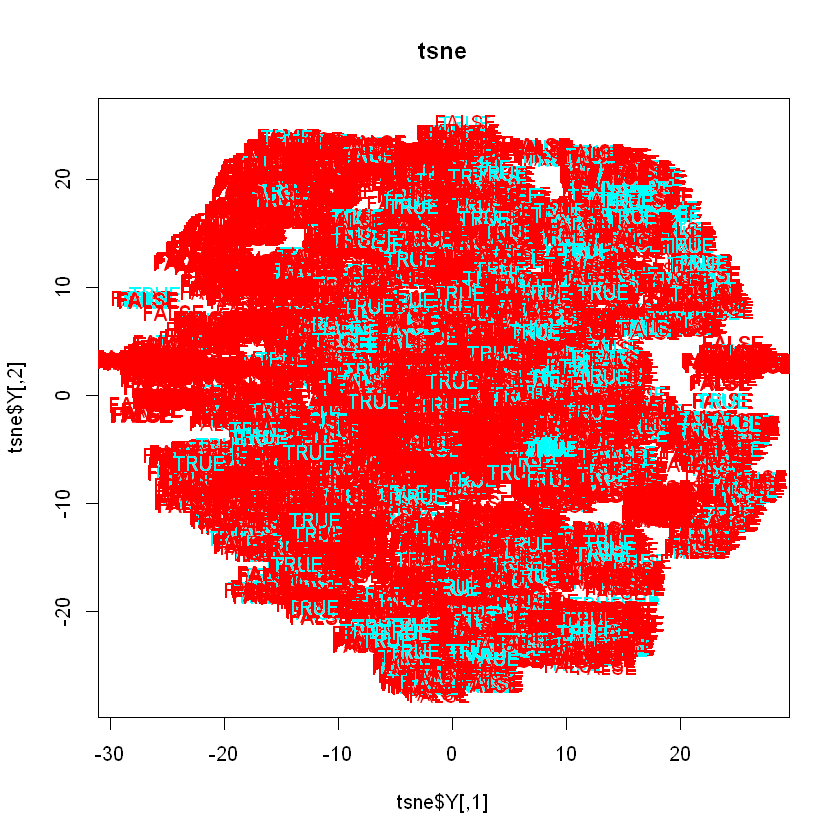

In [154]:
# Plotting our graph and closely examining the graph
# 
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=df.class, col=colors[df.class])



The graph shows  that t-SNE is not a good method to represent customer groups as the graph is not informative at all

### Comparison between the solutions

From the Anlysis, the following can be Noted:

1) Cluster Analysis performs much better in identyfuing patterns as compared to Dimensional reduction

2) Both the methods(clustering and dimensional reduction) have questionable results. Better  results can be achieved.


### Follow up questions

### a). Did we have the right data?

The data used was right for analysis.






### b). Do we need other data to answer our question?

No, we need different methods to answer the questions effectively

### c). Did we have the right question?

Yes, the question is right for analysis.